# 선형회귀분석

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 단순회귀분석

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/college.xlsx', engine = 'openpyxl')
df.head()

,School,Earnings,Cost,Grad,Debt,City
0,St. Ambrose C (NC),44800,22920,62,88,1
1,"Albion College (Albion, MI)",45100,23429,73,92,0
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   School    116 non-null    object
 1   Earnings  116 non-null    int64 
 2   Cost      116 non-null    int64 
 3   Grad      116 non-null    int64 
 4   Debt      116 non-null    int64 
 5   City      116 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.6+ KB


### EDA

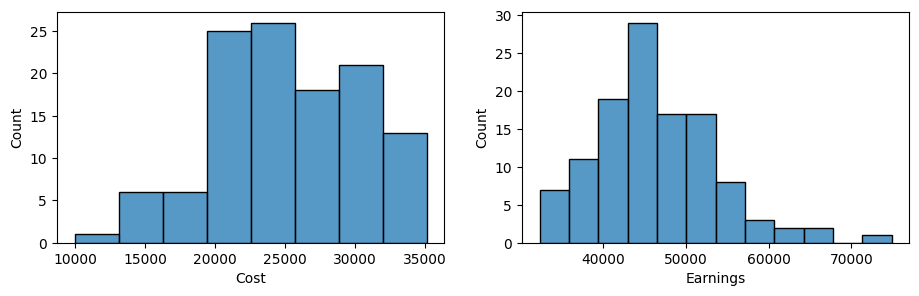

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Cost'], ax = ax1)
sns.histplot(df['Earnings'], ax = ax2)
plt.show()

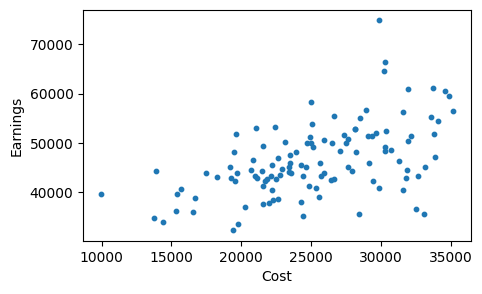

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Cost',
        y = 'Earnings',
        s = 10,
        figsize = (5,3))
plt.show()

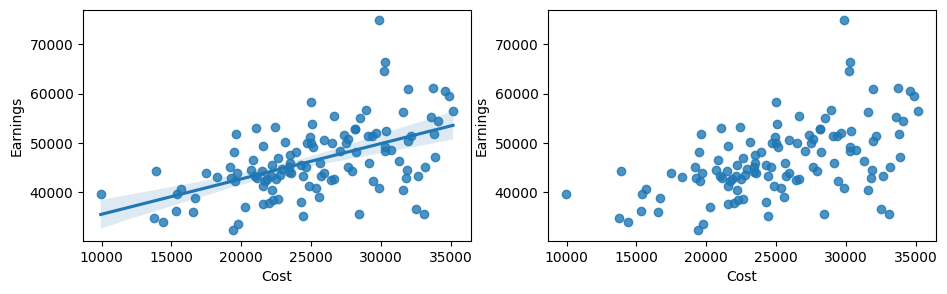

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
plt.show()

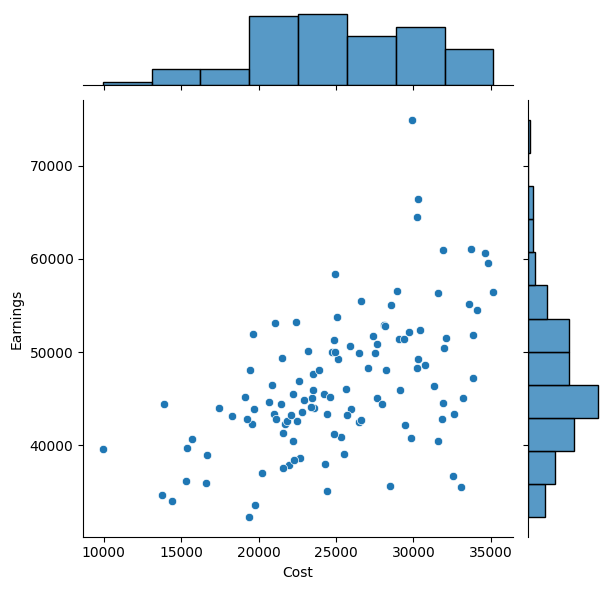

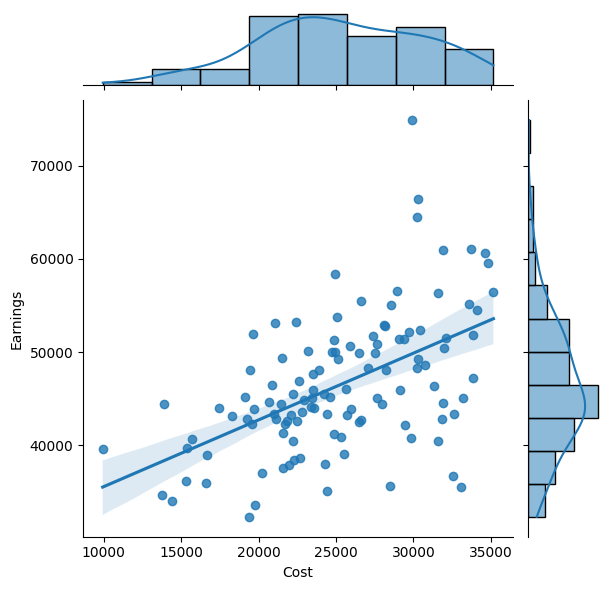

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Cost', y = 'Earnings', data = df)
sns.jointplot(x = 'Cost', y = 'Earnings', kind = 'reg', data = df)
plt.show()

### 모델

In [ ]:
# 전체 데이터
X = df[['Cost']]
y = df['Earnings']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (116, 1)
y 데이터:  (116,)


In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
sr = LinearRegression()
# 모델 훈련
sr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(sr.score(X, y))
r2 = round(sr.score(X, y),2)
print(r2)

0.2766848724365063
0.28


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(sr.intercept_)
intercept = round(sr.intercept_,2)
print(intercept)

28375.405071295143
28375.41


In [ ]:
# 기울기
print(sr.coef_)
slope = round(sr.coef_[0],2)
print(slope)

[0.71687009]
0.72


In [ ]:
X.columns[0]

'Cost'

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept) + " + " + str(slope) + "*" + X.columns[0]
print(equation)

y_hat = 28375.41 + 0.72*Cost


In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
print(rsquared)

R squared = 0.28


In [ ]:
# 예측값
y_pred = sr.predict(X)
y_pred

array([44806.06762472, 45170.95450254, 42402.40219969, 46402.53732396,
       44131.49286631, 49799.78469921, 53181.26093239, 48524.47280206,
       45281.35249701, 52810.63909381, 42107.76859108, 51002.69271686,
       52620.66851891, 45160.91832123, 44608.21147879, 42459.75180721,
       45234.75594091, 40257.52687858, 47788.24721557, 49650.67571966,
       43940.80542132, 38341.33311744, 48198.29690931, 52564.03578149,
       42292.72107532, 49784.01355714, 42329.9983202 , 44710.72390223,
       51242.12732824, 51179.04275997, 43829.69055676, 38696.90068405,
       45770.97477118, 39417.35512847, 45868.46910396, 48558.88256657,
       45756.6373693 , 44979.55018746, 43406.02033123, 44312.14412999,
       50397.65435756, 42893.45821405, 51285.13953388, 45883.52337593,
       46020.44556388, 43810.33506422, 45523.65458877, 46523.68836984,
       51698.056708  , 51771.17745758, 46220.45232009, 46736.59878774,
       43821.08811563, 43520.71954626, 52085.16655873, 44485.62669272,
      

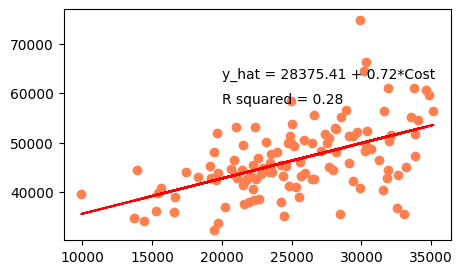

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X, y, 'o', color = 'coral')
plt.plot(X, y_pred, color = 'red')
plt.text(20000, 63000, equation)
plt.text(20000, 58000, rsquared)
plt.show()

In [ ]:
# 예측 성능 평가
# RMSE, MSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred))
# RMSE
print(mean_squared_error(y, y_pred, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred)))
# MAE
print(mean_absolute_error(y, y_pred))
# MAPE
print(mean_absolute_percentage_error(y, y_pred))

38652848.7822697
6217.141528248308
6217.141528248308
4652.193505215204
0.10155621111895947


## 독립변수 변경하여 반복

In [ ]:
# 모델 1: Grad
# 직접 만들어서 해보기
# 1. EDA
# 2. 모델 적용 - 훈련, 성능(결정계수), 예측값, 회귀식 만들어서 시각화, 성능 평가(RMSE외 3개)

In [ ]:
# 모델 2: Debt
# 직접 만들어서 해보기
# 1. EDA
# 2. 모델 적용 - 훈련, 성능(결정계수), 예측값, 회귀식 만들어서 시각화, 성능 평가(RMSE외 3개)

### EDA

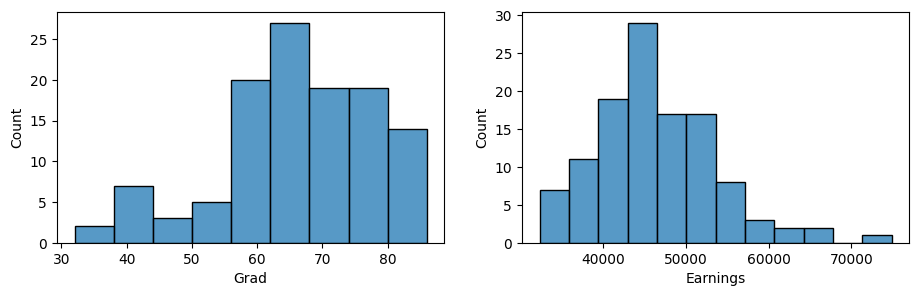

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Grad'], ax = ax1)
sns.histplot(df['Earnings'], ax = ax2)
plt.show()

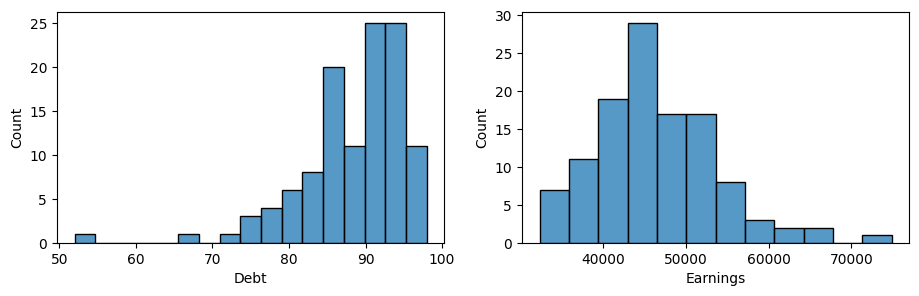

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Debt'], ax = ax1)
sns.histplot(df['Earnings'], ax = ax2)
plt.show()

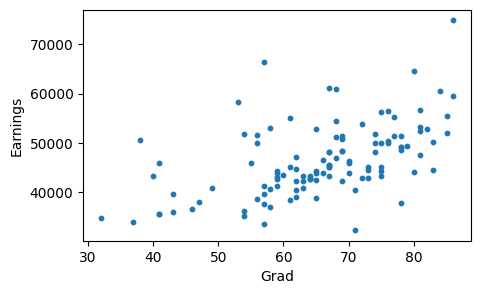

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Grad',
        y = 'Earnings',
        s = 10,
        figsize = (5,3))
plt.show()

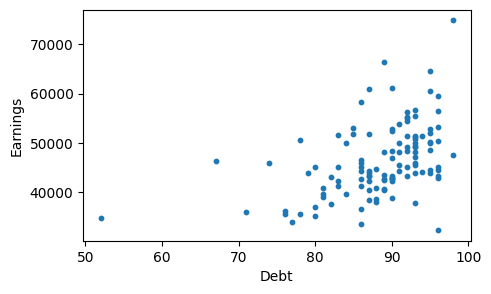

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Debt',
        y = 'Earnings',
        s = 10,
        figsize = (5,3))
plt.show()

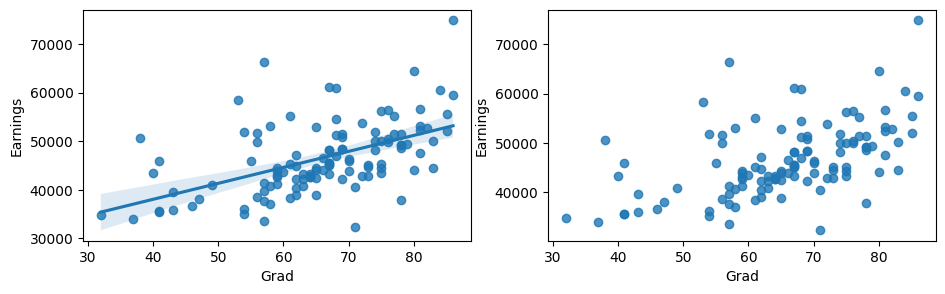

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
plt.show()

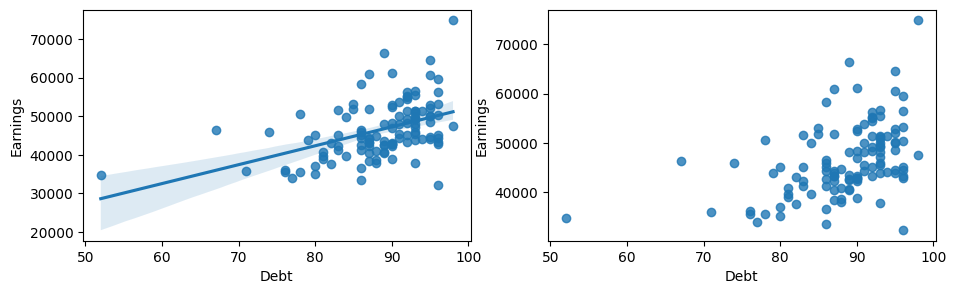

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
plt.show()

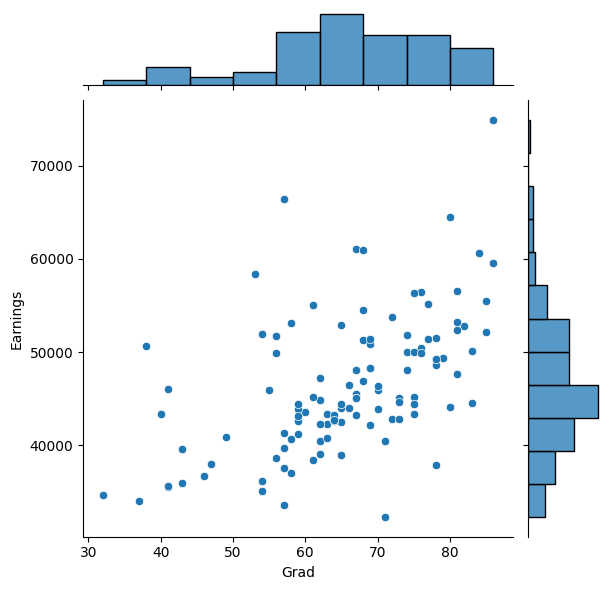

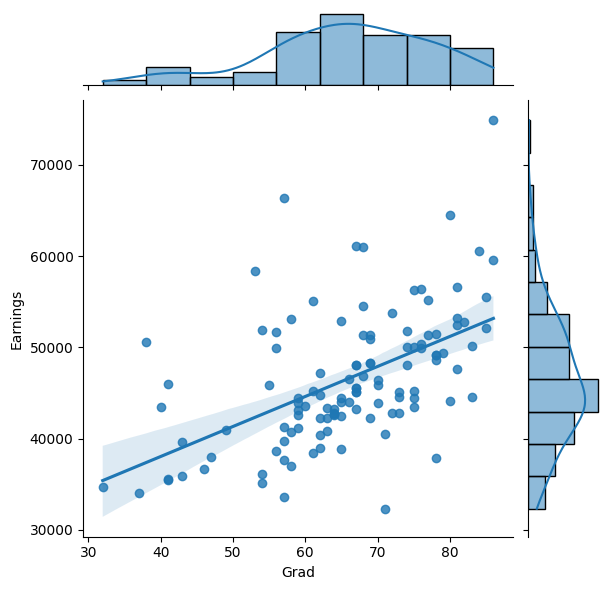

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Grad', y = 'Earnings', data = df)
sns.jointplot(x = 'Grad', y = 'Earnings', kind = 'reg', data = df)
plt.show()

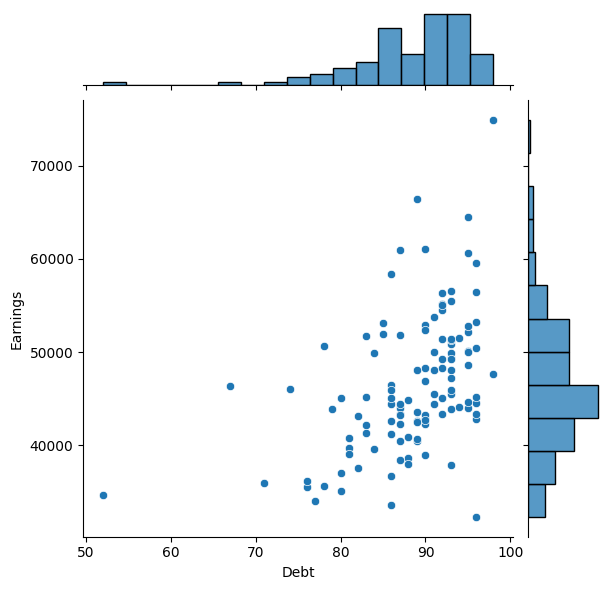

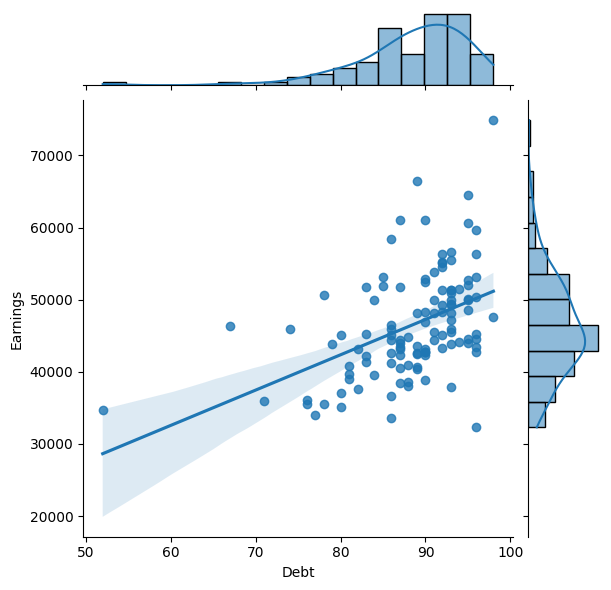

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Debt', y = 'Earnings', data = df)
sns.jointplot(x = 'Debt', y = 'Earnings', kind = 'reg', data = df)
plt.show()

### 모델

In [ ]:
# 전체 데이터
X1 = df[['Grad']]
X2 = df[['Debt']]
y = df['Earnings']

print("X1 데이터: ", X1.shape)
print("X2 데이터: ", X2.shape)
print("y 데이터: ", y.shape)

X1 데이터:  (116, 1)
X2 데이터:  (116, 1)
y 데이터:  (116,)


In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(m1.score(X1, y))
m1_r2 = round(m1.score(X1, y),2)
print(m1_r2)
print(m2.score(X2, y))
m2_r2 = round(m2.score(X2, y),2)
print(m2_r2)

0.2783737715932024
0.28
0.20807551036565408
0.21


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(m1.intercept_)
intercept1 = round(m1.intercept_,2)
print(intercept1)
print(m2.intercept_)
intercept2 = round(m2.intercept_,2)
print(intercept2)

24851.556140479148
24851.56
3182.812342207908
3182.81


In [ ]:
# 기울기
print(m1.coef_)
slope1 = round(m1.coef_[0],2)
print(slope1)
print(m2.coef_)
slope2 = round(m2.coef_[0],2)
print(slope2)

[329.25836563]
329.26
[489.73123045]
489.73


In [ ]:
print(X1.columns)
print(X1.columns[0])
print(X2.columns)
print(X2.columns[0])

Index(['Grad'], dtype='object')
Grad
Index(['Debt'], dtype='object')
Debt


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1) + " + " + str(slope1) + "*" + X1.columns[0]
print(equation1)
equation2 = "y_hat = " + str(intercept2) + " + " + str(slope2) + "*" + X2.columns[0]
print(equation2)

y_hat = 24851.56 + 329.26*Grad
y_hat = 3182.81 + 489.73*Debt


In [ ]:
# 결정계수
rsquared1 = "Model1 R squared = " + str(m1_r2)
print(rsquared1)
rsquared2 = "Model2 R squared = " + str(m2_r2)
print(rsquared2)

Model1 R squared = 0.28
Model2 R squared = 0.21


In [ ]:
# 예측값
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

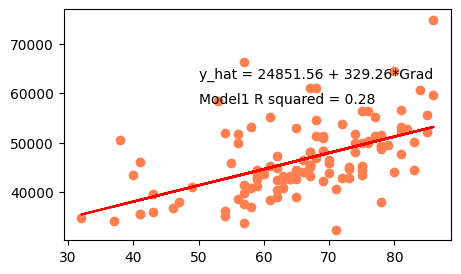

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X1, y, 'o', color = 'coral')
plt.plot(X1, y_pred1, color = 'red')
plt.text(50, 63000, equation1)
plt.text(50, 58000, rsquared1)
plt.show()

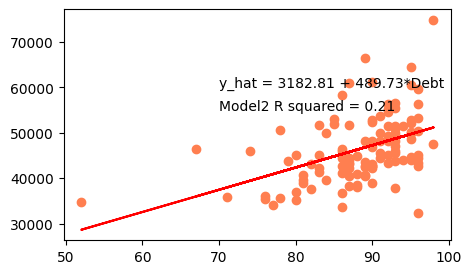

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X2, y, 'o', color = 'coral')
plt.plot(X2, y_pred2, color = 'red')
plt.text(70, 60000, equation2)
plt.text(70, 55000, rsquared2)
plt.show()

In [ ]:
# RMSE, MSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred1))
# RMSE
print(mean_squared_error(y, y_pred1, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred1)))
# MAE
print(mean_absolute_error(y, y_pred1))
# MAPE
print(mean_absolute_percentage_error(y, y_pred1))
print('\n')
# MSE
print(mean_squared_error(y, y_pred2))
# RMSE
print(mean_squared_error(y, y_pred2, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred2)))
# MAE
print(mean_absolute_error(y, y_pred2))
# MAPE
print(mean_absolute_percentage_error(y, y_pred2))

38562596.606938906
6209.878952680068
6209.878952680068
4523.437073230585
0.09648092694710192


42319227.64829148
6505.3230241311985
6505.3230241311985
5034.609567161763
0.10877300305850596


## 다중회귀분석

In [ ]:
df.columns

Index(['School', 'Earnings', 'Cost', 'Grad', 'Debt', 'City'], dtype='object')

### EDA

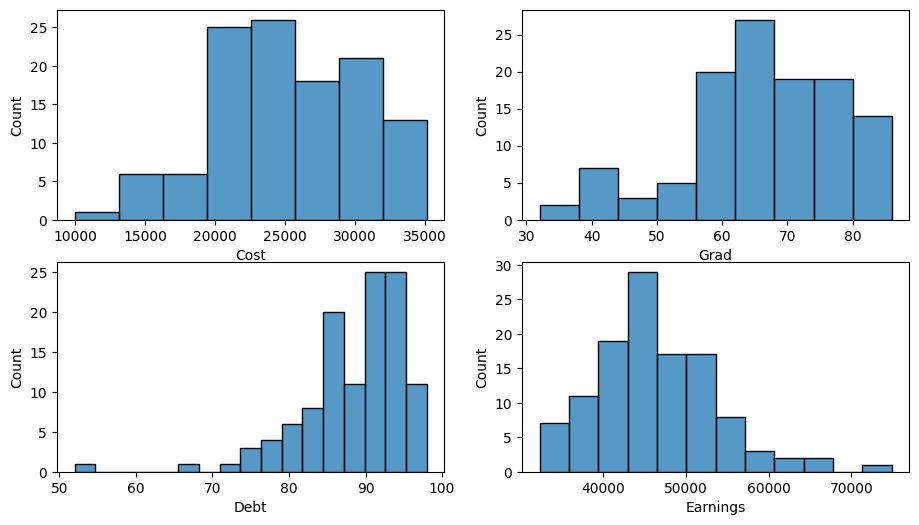

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 6])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(df['Cost'], ax = ax1)
sns.histplot(df['Grad'], ax = ax2)
sns.histplot(df['Debt'], ax = ax3)
sns.histplot(df['Earnings'], ax = ax4)
plt.show()

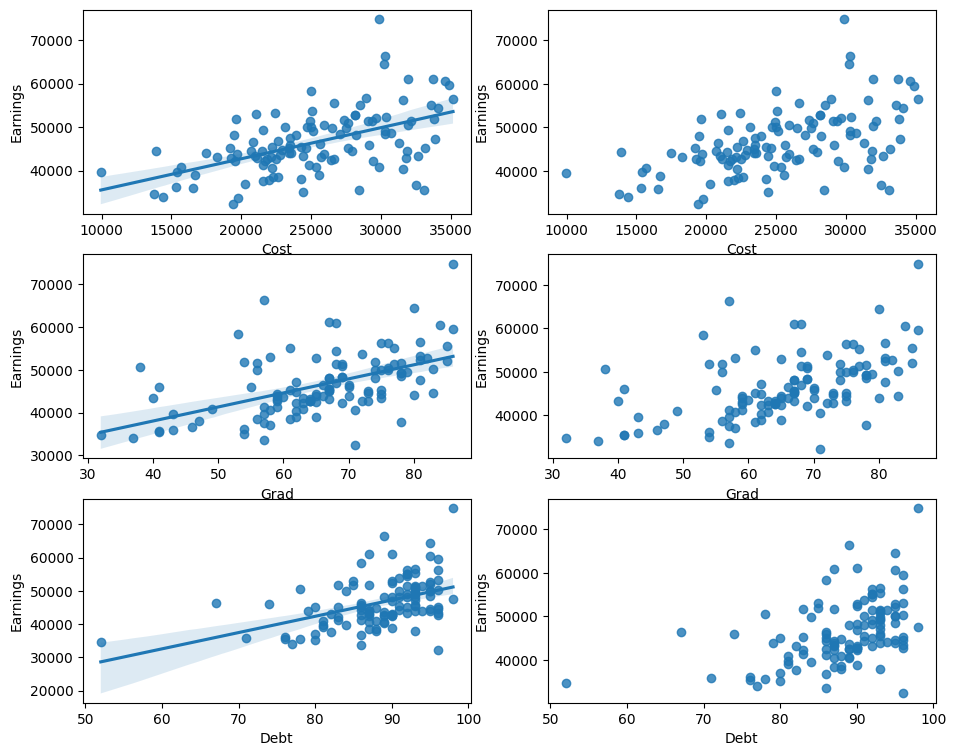

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 9])
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, ax = ax3)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, fit_reg = False, ax = ax4)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, ax = ax5)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, fit_reg = False, ax = ax6)
plt.show()

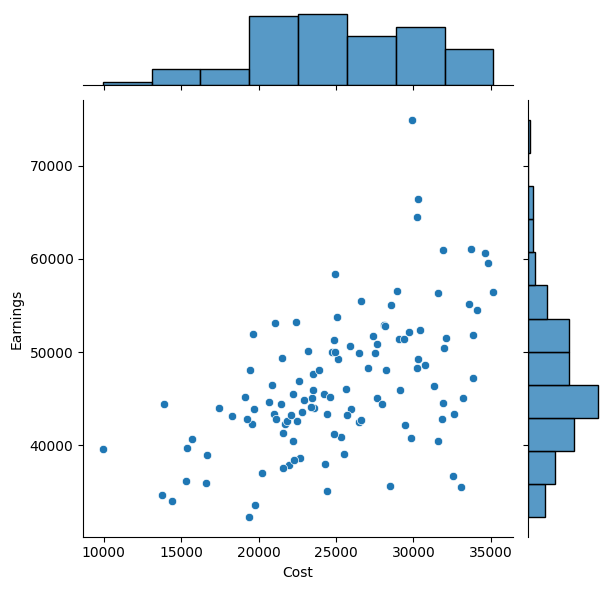

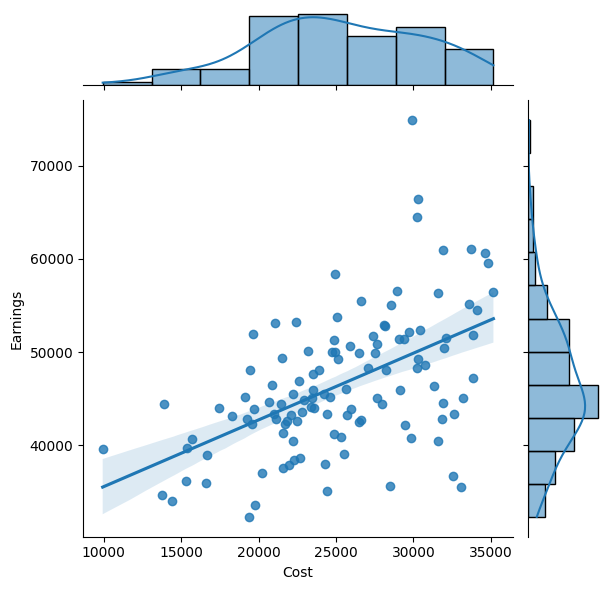

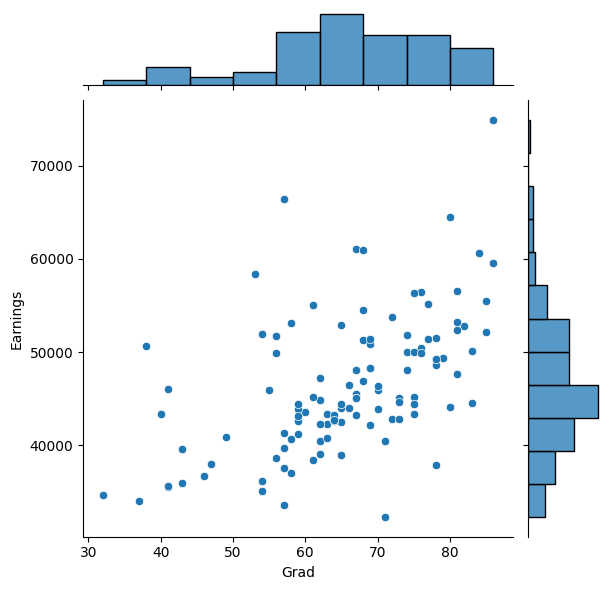

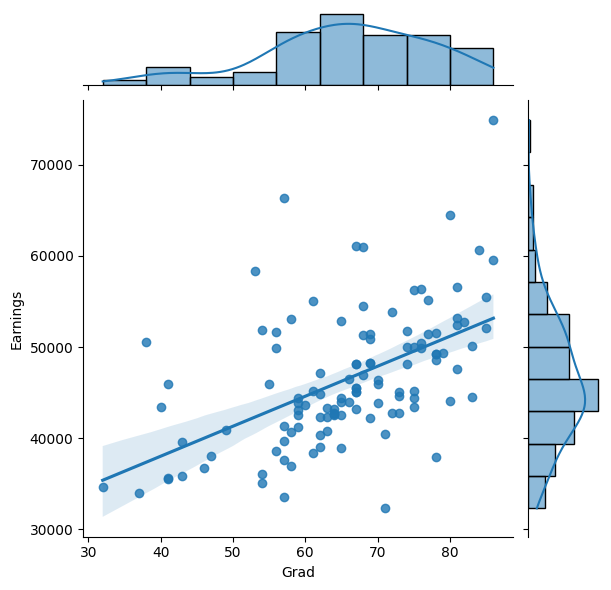

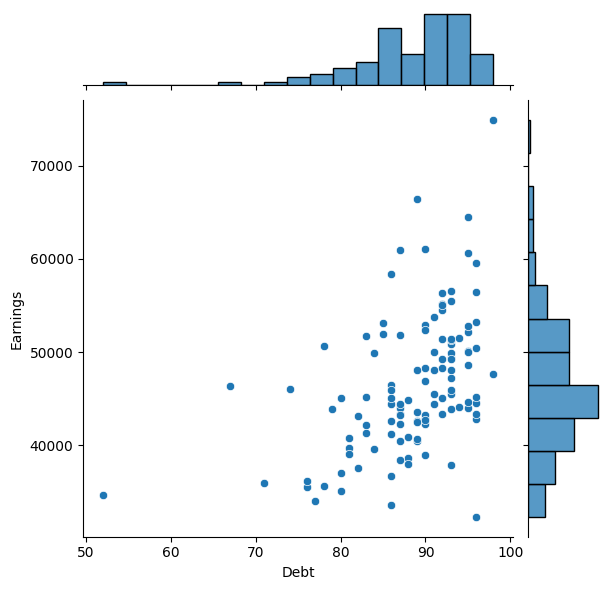

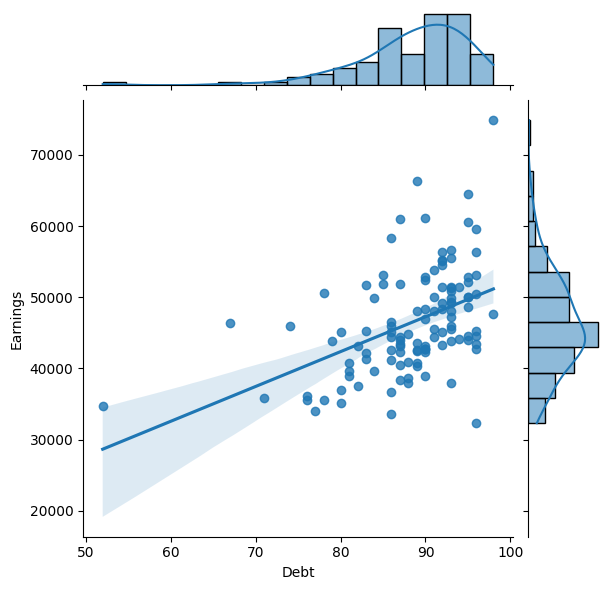

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Cost', y = 'Earnings', data = df)
sns.jointplot(x = 'Cost', y = 'Earnings', kind = 'reg', data = df)
sns.jointplot(x = 'Grad', y = 'Earnings', data = df)
sns.jointplot(x = 'Grad', y = 'Earnings', kind = 'reg', data = df)
sns.jointplot(x = 'Debt', y = 'Earnings', data = df)
sns.jointplot(x = 'Debt', y = 'Earnings', kind = 'reg', data = df)
plt.show()

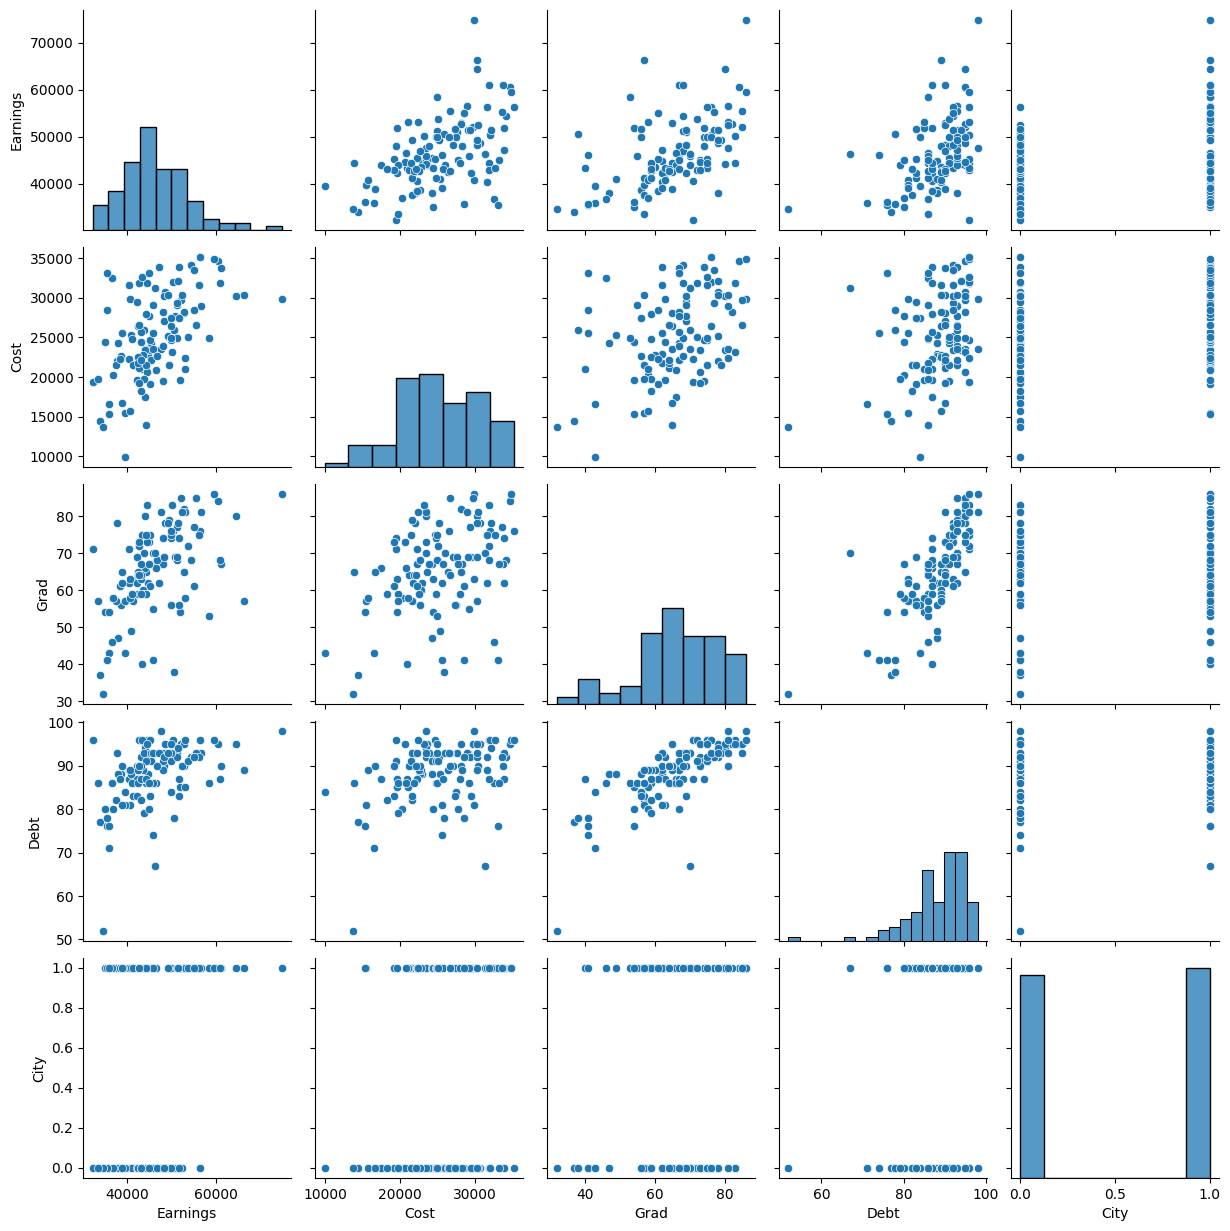

In [ ]:
# pair plot
sns.pairplot(df)
plt.show()

### 모델

In [ ]:
df.head()

,School,Earnings,Cost,Grad,Debt,City
0,St. Ambrose C (NC),44800,22920,62,88,1
1,"Albion College (Albion, MI)",45100,23429,73,92,0
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1


In [ ]:
# 전체 데이터
X = df.loc[:,'Cost':'City']
y = df['Earnings']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (116, 4)
y 데이터:  (116,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X, y))
r2 = round(mr.score(X, y),2)
print(r2)

0.4292226665884976
0.43


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(mr.intercept_)
intercept = round(mr.intercept_,2)
print(intercept)

10004.966451789987
10004.97


In [ ]:
# 기울기
print(mr.coef_)
slope = [round(x, 2) for x in mr.coef_]
print(slope)

[4.34913810e-01 1.78098909e+02 1.41478300e+02 2.52678881e+03]
[0.43, 178.1, 141.48, 2526.79]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

Cost: 0.43
Grad: 178.1
Debt: 141.48
City: 2526.79


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {}*{}".format(coef, name)
print(equation)

y_hat = 10004.97 + 0.43*Cost + 178.1*Grad + 141.48*Debt + 2526.79*City


In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
print(rsquared)

R squared = 0.43


In [ ]:
# 예측값
y_pred = mr.predict(X)

In [ ]:
# 예측 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred))
# RMSE
print(mean_squared_error(y, y_pred, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred)))
# MAE
print(mean_absolute_error(y, y_pred))
# MAPE
print(mean_absolute_percentage_error(y, y_pred))

30501463.492155824
5522.813005358395
5522.813005358395
4088.9424357277067
0.08909875385487628


## 독립변수 변경하여 비교

In [ ]:
df.columns

Index(['School', 'Earnings', 'Cost', 'Grad', 'Debt', 'City'], dtype='object')

In [ ]:
# 모델 1: Cost, Grad
# 모델 2: Cost, Grad, Debt
# 모델 3: Cost, Grad, City
# 모델 4: Cost, Debt, City
# 모델 5: Cost, Grad, Debt, City
# 직접 만들어서 해보기
# 모델 훈련
# 모델 결정계수
# 회귀식 만들기 - 절편, 회귀계수
# 예측값
# 성능 평가(RMSE외3개)
# 결정계수로 비교가 가능한가?
# 성능평가 중에서 어떤 모델이 가장 좋은가?

### 모델

In [ ]:
# 전체 데이터
X = df.loc[:,'Cost':'City']
y = df['Earnings']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (116, 4)
y 데이터:  (116,)


In [ ]:
X.columns

Index(['Cost', 'Grad', 'Debt', 'City'], dtype='object')

In [ ]:
X1 = X.iloc[:,[0,1]]
X2 = X.iloc[:,[0,1,2]]
X3 = X.iloc[:,[0,1,3]]
X4 = X.iloc[:,[0,2,3]]
X5 = X.iloc[:,[0,1,2,3]]
print(X1.columns)
print("X 데이터: ", X1.shape)
print(X2.columns)
print("X 데이터: ", X2.shape)
print(X3.columns)
print("X 데이터: ", X3.shape)
print(X4.columns)
print("X 데이터: ", X4.shape)
print(X5.columns)
print("X 데이터: ", X5.shape)

Index(['Cost', 'Grad'], dtype='object')
X 데이터:  (116, 2)
Index(['Cost', 'Grad', 'Debt'], dtype='object')
X 데이터:  (116, 3)
Index(['Cost', 'Grad', 'City'], dtype='object')
X 데이터:  (116, 3)
Index(['Cost', 'Debt', 'City'], dtype='object')
X 데이터:  (116, 3)
Index(['Cost', 'Grad', 'Debt', 'City'], dtype='object')
X 데이터:  (116, 4)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)
m3 = LinearRegression();m3.fit(X3, y)
m4 = LinearRegression();m4.fit(X4, y)
m5 = LinearRegression();m5.fit(X5, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(m1.score(X1, y))
m1_r2 = round(m1.score(X1, y),3)
print(m1_r2)
print(m2.score(X2, y))
m2_r2 = round(m2.score(X2, y),3)
print(m2_r2)
print(m3.score(X3, y))
m3_r2 = round(m3.score(X3, y),3)
print(m3_r2)
print(m4.score(X4, y))
m4_r2 = round(m4.score(X4, y),3)
print(m4_r2)
print(m5.score(X5, y))
m5_r2 = round(m5.score(X5, y),3)
print(m5_r2)

0.3980786465094057
0.398
0.40225684825136265
0.402
0.42173098731998226
0.422
0.3951559951249227
0.395
0.4292226665884976
0.429


In [ ]:
# 조정결정계수
n = len(df)
print(n)
m1_ar2 = round(1 - (1 - m1.score(X1, y)) * ((n - 1)/(n - X1.shape[1] - 1)),3)
print(m1_ar2)
m2_ar2 = round(1 - (1 - m2.score(X2, y)) * ((n - 1)/(n - X2.shape[1] - 1)),3)
print(m2_ar2)
m3_ar2 = round(1 - (1 - m3.score(X3, y)) * ((n - 1)/(n - X3.shape[1] - 1)),3)
print(m3_ar2)
m4_ar2 = round(1 - (1 - m4.score(X4, y)) * ((n - 1)/(n - X4.shape[1] - 1)),3)
print(m4_ar2)
m5_ar2 = round(1 - (1 - m5.score(X5, y)) * ((n - 1)/(n - X5.shape[1] - 1)),3)
print(m5_ar2)

116
0.387
0.386
0.406
0.379
0.409


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_, 2);print(intercept1)
intercept2 = round(m2.intercept_, 2);print(intercept2)
intercept3 = round(m3.intercept_, 2);print(intercept3)
intercept4 = round(m4.intercept_, 2);print(intercept4)
intercept5 = round(m5.intercept_, 2);print(intercept5)

17980.35
11819.47
18307.86
1300.19
10004.97


In [ ]:
# 기울기
slope1 = [round(x, 2) for x in m1.coef_];print(slope1)
slope2 = [round(x, 2) for x in m2.coef_];print(slope2)
slope3 = [round(x, 2) for x in m3.coef_];print(slope3)
slope4 = [round(x, 2) for x in m4.coef_];print(slope4)
slope5 = [round(x, 2) for x in m5.coef_];print(slope5)

[0.51, 236.6]
[0.5, 192.67, 104.66]
[0.45, 237.43, 2344.09]
[0.49, 355.8, 2787.89]
[0.43, 178.1, 141.48, 2526.79]


In [ ]:
for name, coef in zip(X1.columns, slope1):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X2.columns, slope2):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X3.columns, slope3):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X4.columns, slope4):
  print("{}: {}".format(name, coef))
print("")
for name, coef in zip(X5.columns, slope5):
  print("{}: {}".format(name, coef))

Cost: 0.51
Grad: 236.6

Cost: 0.5
Grad: 192.67
Debt: 104.66

Cost: 0.45
Grad: 237.43
City: 2344.09

Cost: 0.49
Debt: 355.8
City: 2787.89

Cost: 0.43
Grad: 178.1
Debt: 141.48
City: 2526.79


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X1.columns):
  equation1 += " + {}*{}".format(coef, name)
print(equation1)
print("")

equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X2.columns):
  equation2 += " + {}*{}".format(coef, name)
print(equation2)
print("")

equation3 = "y_hat = " + str(intercept3)
for coef, name in zip(slope3, X3.columns):
  equation3 += " + {}*{}".format(coef, name)
print(equation3)
print("")

equation4 = "y_hat = " + str(intercept4)
for coef, name in zip(slope4, X4.columns):
  equation4 += " + {}*{}".format(coef, name)
print(equation4)
print("")

equation5 = "y_hat = " + str(intercept5)
for coef, name in zip(slope5, X5.columns):
  equation5 += " + {}*{}".format(coef, name)
print(equation5)

y_hat = 17980.35 + 0.51*Cost + 236.6*Grad

y_hat = 11819.47 + 0.5*Cost + 192.67*Grad + 104.66*Debt

y_hat = 18307.86 + 0.45*Cost + 237.43*Grad + 2344.09*City

y_hat = 1300.19 + 0.49*Cost + 355.8*Debt + 2787.89*City

y_hat = 10004.97 + 0.43*Cost + 178.1*Grad + 141.48*Debt + 2526.79*City


In [ ]:
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)
y_pred3 = m3.predict(X3)
y_pred4 = m4.predict(X4)
y_pred5 = m5.predict(X5)

In [ ]:
# 예측 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred1))
print(mean_squared_error(y, y_pred2))
print(mean_squared_error(y, y_pred3))
print(mean_squared_error(y, y_pred4))
print(mean_squared_error(y, y_pred5))
print("")
# RMSE
print(mean_squared_error(y, y_pred1, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred1)))
print(mean_squared_error(y, y_pred2, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred2)))
print(mean_squared_error(y, y_pred3, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred3)))
print(mean_squared_error(y, y_pred4, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred4)))
print(mean_squared_error(y, y_pred5, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred5)))
print("")
# MAE
print(mean_absolute_error(y, y_pred1))
print(mean_absolute_error(y, y_pred2))
print(mean_absolute_error(y, y_pred3))
print(mean_absolute_error(y, y_pred4))
print(mean_absolute_error(y, y_pred5))
print("")
# MAPE
print(mean_absolute_percentage_error(y, y_pred1))
print(mean_absolute_percentage_error(y, y_pred2))
print(mean_absolute_percentage_error(y, y_pred3))
print(mean_absolute_percentage_error(y, y_pred4))
print(mean_absolute_percentage_error(y, y_pred5))

32165752.061156392
31942475.381381024
30901807.31859649
32321934.059434585
30501463.492155824

5671.485877718148
5671.485877718148
5651.767456414057
5651.767456414057
5558.939405911571
5558.939405911571
5685.238258809791
5685.238258809791
5522.813005358395
5522.813005358395

4139.24802607524
4143.659290459948
4070.519849471947
4313.27020952789
4088.9424357277067

0.08926265561608485
0.08954385534046795
0.08836843093396776
0.09470210584299511
0.08909875385487628


### 미션 - 예측

In [ ]:
# 모형 적용 결과를 기반으로 Cost = 25000, Grad = 60, Debt = 80, City = 1일 때, Earnings (y) 값을 예측하세요.
# 모델 5번을 이용하여 계산합니다.
Cost = 25000; Grad = 60; Debt = 80; City = 1
y_hat = 10004.97 + 0.43*Cost + 178.1*Grad + 141.48*Debt + 2526.79*City
y_hat

45286.16

# 범주가 여러개인 더미변수

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/retail.xlsx', engine = 'openpyxl')
df.head()

,Year,Quarter,Sales,GNP
0,2007,1,921266,14301.854
1,2007,2,1013371,14512.945
2,2007,3,1000151,14717.814
3,2007,4,1060394,14880.255
4,2008,1,950268,14848.718


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     40 non-null     int64  
 1   Quarter  40 non-null     int64  
 2   Sales    40 non-null     int64  
 3   GNP      40 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


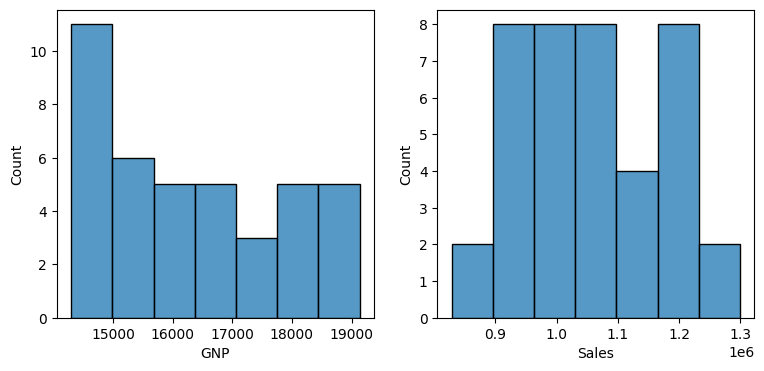

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [9, 4])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['GNP'], ax = ax1)
sns.histplot(df['Sales'], ax = ax2)
plt.show()

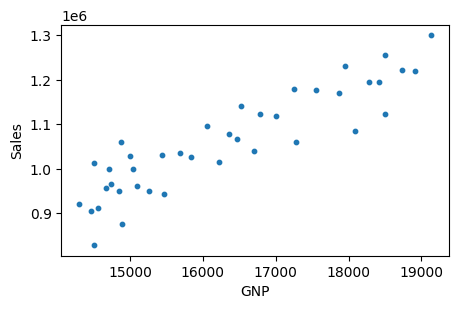

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'GNP',
        y = 'Sales',
        s = 10,
        figsize = (5,3))
plt.show()

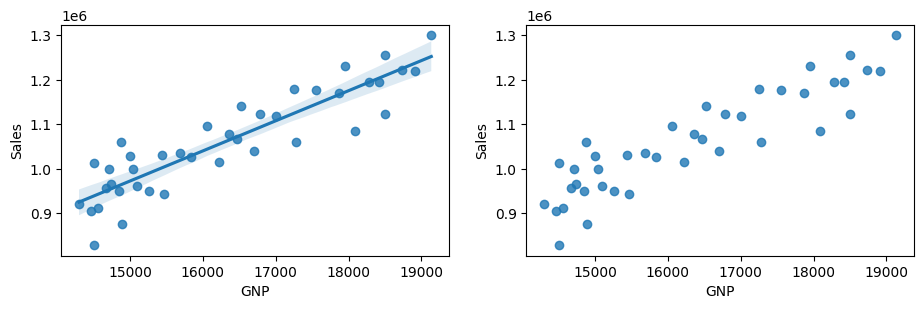

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'GNP', y = 'Sales', data = df, ax = ax1)
sns.regplot(x = 'GNP', y = 'Sales', data = df, fit_reg = False, ax = ax2)
plt.show()

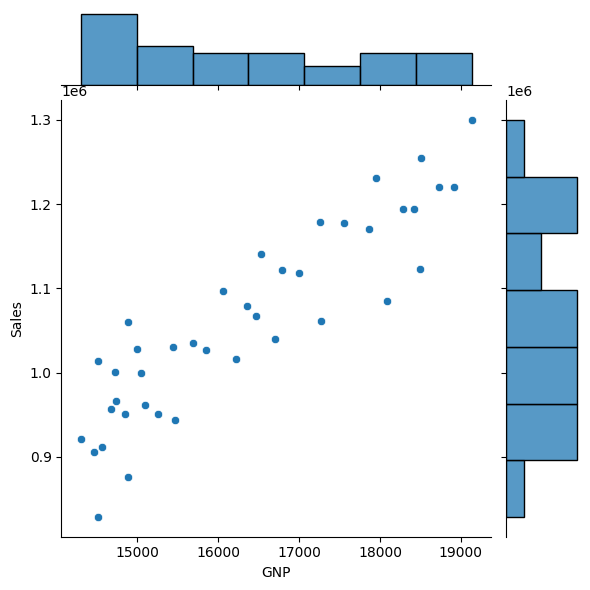

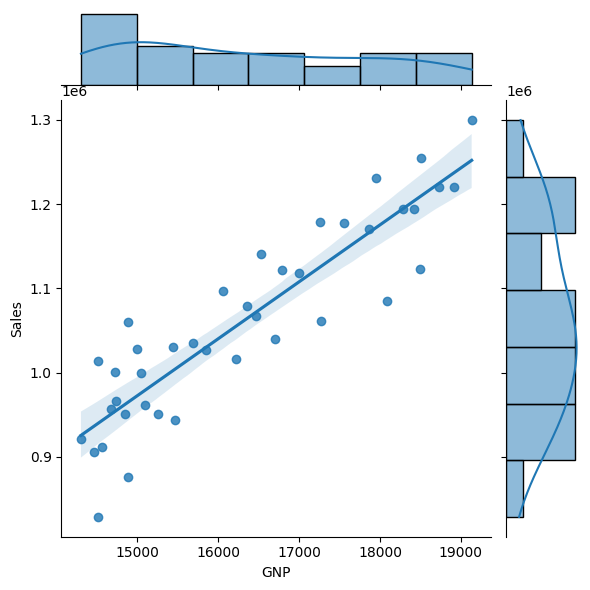

In [ ]:
# 조인트 그림
sns.jointplot(x = 'GNP', y = 'Sales', data = df)
sns.jointplot(x = 'GNP', y = 'Sales', kind = 'reg', data = df)
plt.show()

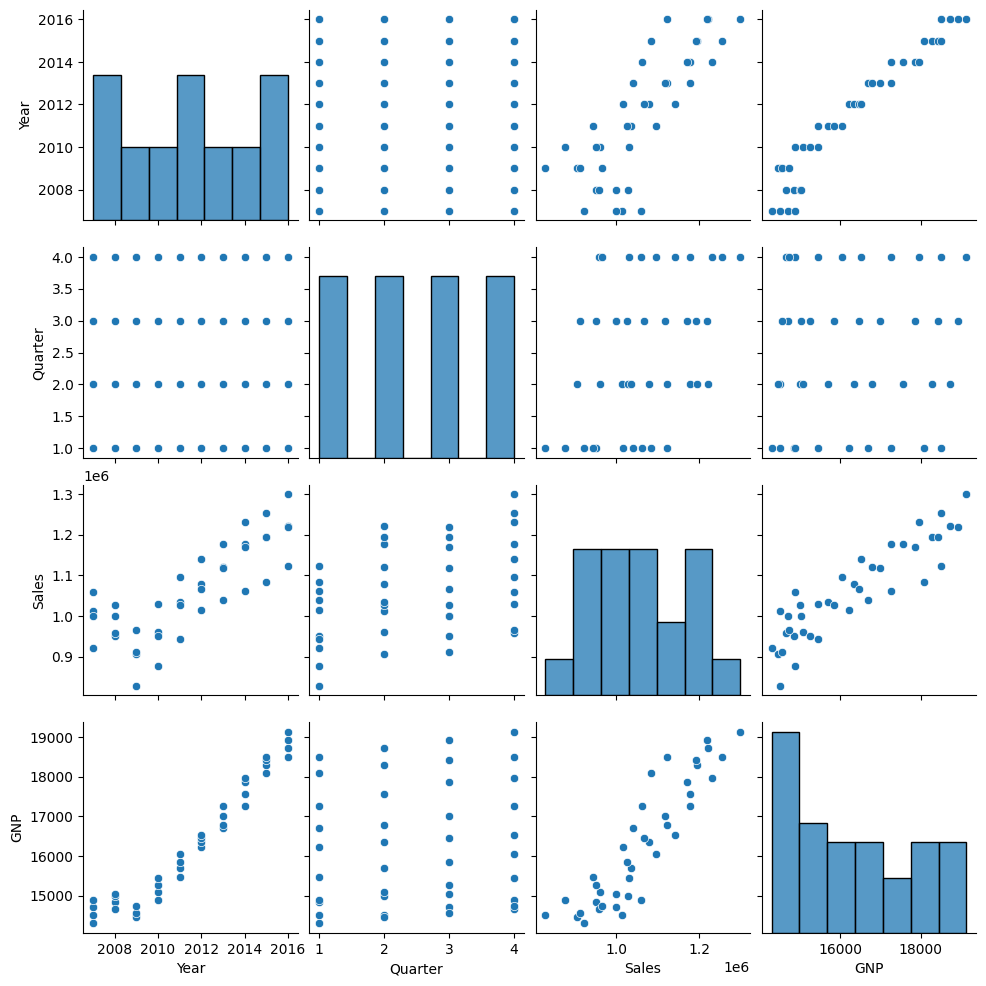

In [ ]:
# pair plot
sns.pairplot(df)
plt.show()

In [ ]:
# 전체 데이터
X = df.loc[:,['GNP','Quarter']]
y = df['Sales']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (40, 2)
y 데이터:  (40,)


In [ ]:
# 빈도표
X.Quarter.value_counts()

Quarter
1    10
2    10
3    10
4    10
Name: count, dtype: int64

In [ ]:
pd.get_dummies(X['Quarter'])

,1,2,3,4
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True
8,True,False,False,False
9,False,True,False,False


In [ ]:
pd.get_dummies(X['Quarter'], drop_first=True)

,2,3,4
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False
5,True,False,False
6,False,True,False
7,False,False,True
8,False,False,False
9,True,False,False


In [ ]:
# 더미변수
dm = pd.get_dummies(X['Quarter'])
dm.columns = ['q1', 'q2', 'q3', 'q4']
X_dm = pd.concat([X, dm], axis = 1)

In [ ]:
X_dm

,GNP,Quarter,q1,q2,q3,q4
0,14301.854,1,True,False,False,False
1,14512.945,2,False,True,False,False
2,14717.814,3,False,False,True,False
3,14880.255,4,False,False,False,True
4,14848.718,1,True,False,False,False
5,14997.477,2,False,True,False,False
6,15045.188,3,False,False,True,False
7,14671.011,4,False,False,False,True
8,14512.300,1,True,False,False,False
9,14465.085,2,False,True,False,False


In [ ]:
X = X_dm.iloc[:, [0,2,3,4]]

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
r2 = mr.score(X, y);r2

0.9363584919652923

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = round(mr.intercept_, 4);intercept

47095.6859

In [ ]:
# 기울기
slope = [round(x, 4) for x in mr.coef_];print(slope)

[65.0548, -108765.258, -30486.2947, -48805.0461]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

GNP: 65.0548
q1: -108765.258
q2: -30486.2947
q3: -48805.0461


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 47095.6859 + 65.0548 * GNP + -108765.258 * q1 + -30486.2947 * q2 + -48805.0461 * q3


In [ ]:
y_pred = mr.predict(X)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y, y_pred, squared = False))
print(mean_absolute_error(y, y_pred))

28375.106546035728
22584.24931149037


In [ ]:
# 미션
# GNP 가 18000 이고, 2분기일 때 Sales 예측값과 4분기일 때 Sales 예측값을 비교하시오.
GNP = 18000;q1 = 0;q2 = 1;q3 = 0
y_hat = 47095.6859 + 65.0548 * GNP + -108765.258 * q1 + -30486.2947 * q2 + -48805.0461 * q3
y_hat

1187595.7911999999

In [ ]:
GNP = 18000;q1 = 0;q2 = 0;q3 = 0
y_hat = 47095.6859 + 65.0548 * GNP + -108765.258 * q1 + -30486.2947 * q2 + -48805.0461 * q3
y_hat

1218082.0858999998